## Overview
### This Notebook will go through the process of creating a boxplot comparing the frequency of syllables between castes (assumes cluster data CSVs have been previously generated)

## Setting up paths, importing dependencies and data

### Import necessary Python libraries

In [2]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Set up path and load cluster data from previously created CSVs

In [10]:
DATA_PATH = "/Users/lukefoster/Documents/CompEtho/Cluster_Comparison_Pipeline"

In [14]:
all_DF = pd.read_csv(f"{DATA_PATH}/all_clusters.csv", index_col=0)

In [15]:
all_DF

,Video File,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,...,cluster38,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47
0,10BYmidfd_antmovie200928223820,0.0,0.0,0.0,0.161857,0.190715,0.196989,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,fr_no_antennae_antmovie200927211714,0.0,0.0,0.0,0.007194,0.244604,0.273381,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,00AAmidfr_antmovie200926195039,0.0,0.0,0.0,0.186091,0.222062,0.225899,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,04WTmidfr_antmovie201010202950,0.0,0.0,0.0,0.250520,0.163410,0.129730,0.0,0.0,0.025780,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,06WRmajfd_antmovie200929211318,0.0,0.0,0.0,0.166429,0.187807,0.115281,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,05WOmajfd_antmovie201010205850,0.0,0.0,0.0,0.127257,0.171477,0.270297,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
139,08dOminfd_antmovie200927211313,0.0,0.0,0.0,0.159574,0.021277,0.553191,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
140,10RYfr_left_antn_no_move_antmovie200927214552,0.0,0.0,0.0,0.104408,0.186195,0.319606,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
141,mean,0.0,0.0,0.0,0.177375,0.186876,0.169418,0.0,0.0,0.001878,...,0.0,0.0,0.000038,0.0,0.001176,0.000328,0.0,0.0,0.000074,0.001353


In [16]:
castes = ['maj', 'mid', 'min']

# remove video files that don't fit within specified caste keywords
try:
    for i in range(len(all_DF)):
        if any(caste in all_DF["Video File"][i] for caste in castes):
            pass
        else:
            all_DF = all_DF.drop(i)
except:
    print("already dropped un-wanted videos")


df = all_DF.reset_index(drop=True)

df["caste"] = ""

for i in range(len(df)):
    for caste in castes:
        if caste in df["Video File"][i]:
            df["caste"][i] += caste
            
for i in range(len(df)):
    if df.isnull()["cluster0"][i]:
        df = df.drop(i)
        
df = df.reset_index(drop=True)

<ipython-input-16-baeb8613202c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["caste"][i] += caste


In [17]:
df

,Video File,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,...,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,caste
0,10BYmidfd_antmovie200928223820,0.0,0.0,0.0,0.161857,0.190715,0.196989,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,mid
1,00AAmidfr_antmovie200926195039,0.0,0.0,0.0,0.186091,0.222062,0.225899,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,mid
2,04WTmidfr_antmovie201010202950,0.0,0.0,0.0,0.250520,0.163410,0.129730,0.0,0.0,0.02578,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,mid
3,06WRmajfd_antmovie200929211318,0.0,0.0,0.0,0.166429,0.187807,0.115281,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,maj
4,04Ydmidfd_antmovie200924204640,0.0,0.0,0.0,0.191365,0.117853,0.031505,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.156359,0.0,0.0,0.0,0.0,0.0,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,15RTmidfr_antmovie200927233405,0.0,0.0,0.0,0.223547,0.198983,0.137645,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,mid
124,03YBmajfr_antmovie200928195842,0.0,0.0,0.0,0.124230,0.183157,0.276605,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,maj
125,03BPmajfr_antmovie200929200853,0.0,0.0,0.0,0.163443,0.177902,0.191774,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,maj
126,05WOmajfd_antmovie201010205850,0.0,0.0,0.0,0.127257,0.171477,0.270297,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,maj


## Creating box plot of per-caste cluster data

### Create Pandas dataframe containing all cluster data

In [34]:
cluster_data = []

for cluster in range(df.shape[1]-2):
    for i,proportion in enumerate(df[f"cluster{cluster}"]):
        row = [cluster, df['caste'][i], proportion]
        cluster_data.append(row)

cluster_DF = pd.DataFrame(data=cluster_data)
cluster_DF = cluster_DF.rename(columns={0: "cluster", 1: "caste", 2: "proportion"})

In [37]:
cluster_DF

,cluster,caste,proportion
0,0,mid,0.0
1,0,mid,0.0
2,0,mid,0.0
3,0,maj,0.0
4,0,mid,0.0
...,...,...,...
6139,47,mid,0.0
6140,47,maj,0.0
6141,47,maj,0.0
6142,47,maj,0.0


### Plot dataframe data onto boxplot

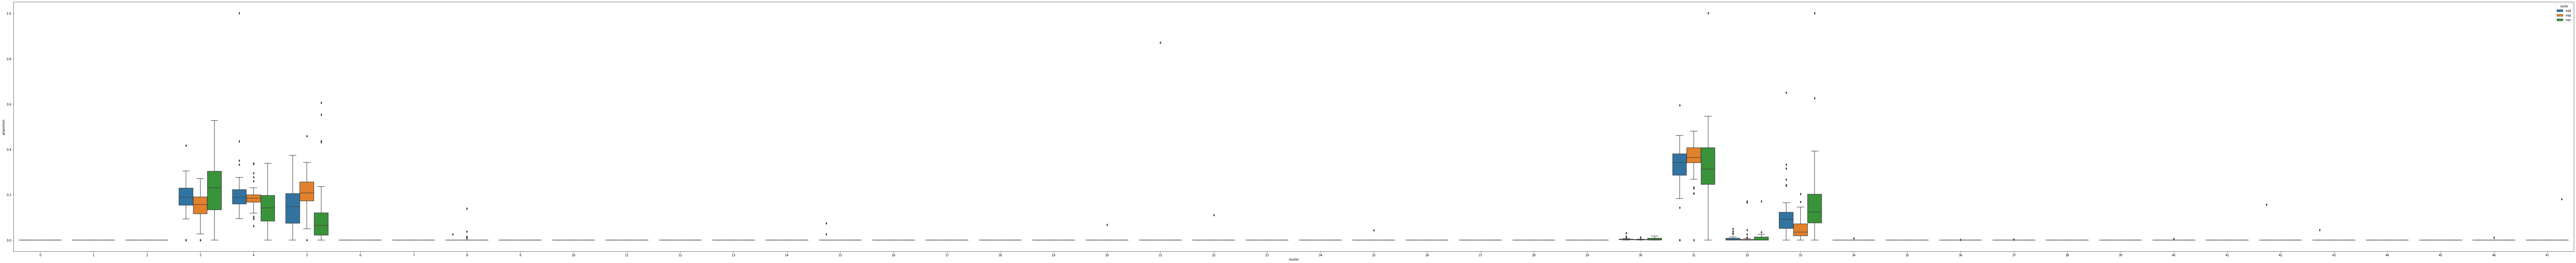

In [35]:
fig, ax = plt.subplots(figsize=(150,15))
ax = sns.boxplot(x="cluster", y="proportion", hue="caste", 
                 data=cluster_DF)
plt.savefig("all_clusters.png")
plt.show()